### 데이터 하나로 통합하기

In [1]:
import json
import pandas as pd

with open('../Datasets/train.json', 'r', encoding='utf-8') as f:
    json_data = json.load(f)

In [2]:
train_data = pd.DataFrame(json_data)
train_data = train_data.drop(['tags', 'plylst_title', 'updt_date'], axis=1)
train_data = train_data.explode('songs')
train_data.rename(columns={'songs':'song_id', 'id':'plylst_id'}, inplace=True)
train_data.head()

,plylst_id,song_id,like_cnt
0,61281,525514,71
0,61281,129701,71
0,61281,383374,71
0,61281,562083,71
0,61281,297861,71


In [3]:
with open('../Datasets/song_meta.json', 'r', encoding='utf-8') as f:
    json_data = json.load(f)

In [4]:
song_data = pd.DataFrame(json_data)
song_data = song_data.drop(['artist_id_basket', 'issue_date', 'artist_name_basket', 'song_gn_gnr_basket'], axis=1)
song_data.rename(columns={'id':'song_id', 'song_gn_dtl_gnr_basket':'genre'}, inplace=True)
song_data.head()

,genre,album_name,album_id,song_name,song_id
0,[GN0901],불후의 명곡 - 7080 추억의 얄개시대 팝송베스트,2255639,Feelings,0
1,"[GN1601, GN1606]","Bach : Partitas Nos. 2, 3 & 4",376431,"Bach : Partita No. 4 In D Major, BWV 828 - II....",1
2,[GN0901],Hit,4698747,Solsbury Hill (Remastered 2002),2
3,"[GN1102, GN1101]",Feeling Right (Everything Is Nice) (Feat. Popc...,2644882,Feeling Right (Everything Is Nice) (Feat. Popc...,3
4,"[GN1802, GN1801]",그남자 그여자,2008470,그남자 그여자,4


In [5]:
genre_list = []

for l in song_data['genre']:
    temp = dict()
    g = 0
    mx = 0
    
    for i in l:
        i = i[2:]
        n = int(i) // 100
        if n in temp:
            temp[n] += 1
        else:
            temp[n] = 1
    
    for i in temp:
        if mx < temp[i]:
            g = i
            mx = temp[i]
        elif mx == temp[i] and g > i:
            g = i
        
    genre_list.append(g)

song_data['genre'] = genre_list
song_data.head()

,genre,album_name,album_id,song_name,song_id
0,9,불후의 명곡 - 7080 추억의 얄개시대 팝송베스트,2255639,Feelings,0
1,16,"Bach : Partitas Nos. 2, 3 & 4",376431,"Bach : Partita No. 4 In D Major, BWV 828 - II....",1
2,9,Hit,4698747,Solsbury Hill (Remastered 2002),2
3,11,Feeling Right (Everything Is Nice) (Feat. Popc...,2644882,Feeling Right (Everything Is Nice) (Feat. Popc...,3
4,18,그남자 그여자,2008470,그남자 그여자,4


In [6]:
merge = pd.merge(train_data, song_data)
merge.head(30)

,plylst_id,song_id,like_cnt,genre,album_name,album_id,song_name
0,61281,525514,71,14,Hey Little Girl,2200223,Hey Little Girl
1,122798,525514,285,14,Hey Little Girl,2200223,Hey Little Girl
2,76836,525514,8,14,Hey Little Girl,2200223,Hey Little Girl
3,117966,525514,902,14,Hey Little Girl,2200223,Hey Little Girl
4,19623,525514,1,14,Hey Little Girl,2200223,Hey Little Girl
5,10853,525514,10,14,Hey Little Girl,2200223,Hey Little Girl
6,94159,525514,132,14,Hey Little Girl,2200223,Hey Little Girl
7,61281,129701,71,9,Brass,2201802,Octagon
8,122798,129701,285,9,Brass,2201802,Octagon
9,145788,129701,24,9,Brass,2201802,Octagon


In [7]:
merge.describe()

,plylst_id,like_cnt,genre,album_id
count,5.285871e+06,5.285871e+06,5.285871e+06,5.285871e+06
mean,7.657437e+04,1.755678e+02,9.369573e+00,3.793252e+06
std,4.425182e+04,9.041993e+02,7.483748e+00,3.907037e+06
min,1.000000e+00,0.000000e+00,0.000000e+00,1.600000e+01
25%,3.823200e+04,4.000000e+00,3.000000e+00,7.297540e+05
50%,7.650700e+04,1.200000e+01,9.000000e+00,2.257536e+06
75%,1.148400e+05,4.800000e+01,1.400000e+01,1.001182e+07
max,1.534280e+05,5.321100e+04,2.800000e+01,1.042206e+07


### 데이터 전처리 - Drop / Replace / Normalization
**like_cnt**를 기준으로 노래를 선정하고, 이를 기준으로 데이터 정제하기
* 표준화 vs 상한값 대체
  1. 표준화 후 특정 시그마 바깥의 값들을 제거
  2. boxplot 바깥을 벗어나는 모든 값들을 가장 가까운 경계값로 대체

### 예상 결과
- 이상치 제거를 위한 효율적인 방법 비교

### 추가로 고려할 만한 사항(미반영)
* Data Binding: like_cnt를 범주로 나누기(인기도 순 1~5점 같은 식으로...)
* 노래 유사도를 판단할 기준: 가수, 장르 등
* 데이터가 너무 많다 -> 샘플 추출?

In [8]:
# 1. 정규화
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

In [9]:
scaler_normal = StandardScaler()
merge_normal = merge.copy()
merge_normal[['like_cnt']] = scaler_normal.fit_transform(merge[['like_cnt']])
merge_normal

,plylst_id,song_id,like_cnt,genre,album_name,album_id,song_name
0,61281,525514,-0.115647,14,Hey Little Girl,2200223,Hey Little Girl
1,122798,525514,0.121027,14,Hey Little Girl,2200223,Hey Little Girl
2,76836,525514,-0.185322,14,Hey Little Girl,2200223,Hey Little Girl
3,117966,525514,0.803398,14,Hey Little Girl,2200223,Hey Little Girl
4,19623,525514,-0.193063,14,Hey Little Girl,2200223,Hey Little Girl
...,...,...,...,...,...,...,...
5285866,131982,57503,-0.189746,14,Thirty People Away,3217518,The Chemicals Took Their Toll I Believe
5285867,131982,74465,-0.189746,10,Aiming for Honesty,3307977,A Lack of Armor
5285868,100389,521769,-0.175368,9,Phantoms,304214,So Contagious
5285869,100389,324819,-0.175368,14,Use Somebody,743394,Use Somebody


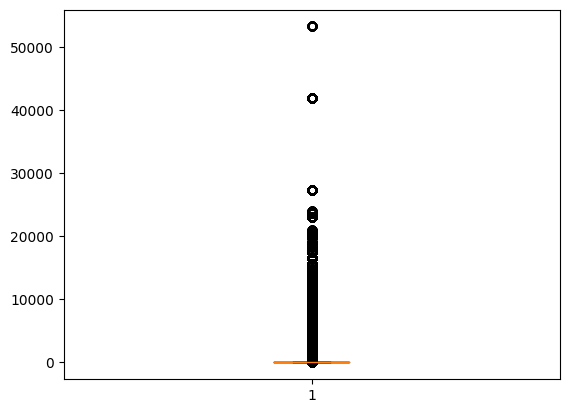

,plylst_id,like_cnt,genre,album_id
count,5.285871e+06,5.285871e+06,5.285871e+06,5.285871e+06
mean,7.657437e+04,4.419829e-18,9.369573e+00,3.793252e+06
std,4.425182e+04,1.000000e+00,7.483748e+00,3.907037e+06
min,1.000000e+00,-1.941693e-01,0.000000e+00,1.600000e+01
25%,3.823200e+04,-1.897455e-01,3.000000e+00,7.297540e+05
50%,7.650700e+04,-1.808979e-01,9.000000e+00,2.257536e+06
75%,1.148400e+05,-1.410837e-01,1.400000e+01,1.001182e+07
max,1.534280e+05,5.865459e+01,2.800000e+01,1.042206e+07


In [10]:
plt.boxplot(merge['like_cnt'])
plt.show()
merge_normal.describe()

### boxplot 분석
* 이상치가 너무 많고 그 영향까지 매우 거대함
* boxplot의 가시성 매우 나쁨
* Q3가 -0.141... 인데 max는 58.654...로 괴리감이 매우 심함
* 이전 단계에서 추가적인 전처리를 하거나, 임의로 샘플링을 해야 스케일링이 유의미하게 가능할 것으로 예상

In [13]:
# 2. 이상치 제거
Q3 = 48
merge['like_cnt'] = merge['like_cnt'].clip(0, Q3)
merge.describe()

,plylst_id,like_cnt,genre,album_id
count,5.285871e+06,5.285871e+06,5.285871e+06,5.285871e+06
mean,7.657437e+04,2.010803e+01,9.369573e+00,3.793252e+06
std,4.425182e+04,1.876767e+01,7.483748e+00,3.907037e+06
min,1.000000e+00,0.000000e+00,0.000000e+00,1.600000e+01
25%,3.823200e+04,4.000000e+00,3.000000e+00,7.297540e+05
50%,7.650700e+04,1.200000e+01,9.000000e+00,2.257536e+06
75%,1.148400e+05,4.800000e+01,1.400000e+01,1.001182e+07
max,1.534280e+05,4.800000e+01,2.800000e+01,1.042206e+07


In [ ]:
with open('../Datasets/test.json', 'r', encoding='utf-8') as f:
    json_data = json.load(f)
    
test_data = pd.DataFrame(json_data)
test_data = test_data.drop(['tags', 'updt_date'], axis=1)
test_data.rename(columns={'songs':'song_id'}, inplace=True)
test_data = train_data.explode('song_id')
test_data

,plylst_id,song_id,like_cnt
0,61281,525514,71
0,61281,129701,71
0,61281,383374,71
0,61281,562083,71
0,61281,297861,71
...,...,...,...
115070,100389,111365,17
115070,100389,51373,17
115070,100389,640239,17
115070,100389,13759,17
